**DECISION TREE**

Importing libraries

In [75]:
import torch
import tensorflow as tf
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
from dataset import TimeSeriesDataset
from dataset import NumpyToTensor
import sklearn
from sklearn.tree import DecisionTreeRegressor
import math
from sklearn.metrics import mean_squared_error

Importing data

In [76]:
train_dataa = pd.read_csv("data/train_delhi_aqi.csv")
test_dataa = pd.read_csv("data/test_delhi_aqi.csv")

In [102]:
# need to be tuned:
sequence_size = 100
num_levels = 6
min_samples_split = 1/(12*13*100)
min_samples_leaf = 1/(12*13*1000)

Setting up dataloader

In [103]:
train_data = TimeSeriesDataset(train_dataa,sequence_size)
# train_dataloader = DataLoader(dataset=train_data, batch_size = math.ceil(len(train_data)/(12*13)), shuffle=False, num_workers=2)
train_dataloader = DataLoader(dataset=train_data, batch_size = 10000, shuffle=False, num_workers=2)

Converting the dataloader into an iterable

In [104]:
dataiter = iter(train_dataloader)

In [105]:
data = next(dataiter)

Creating the tree classes

In [106]:
# # Fit regression model
# regr_1 = DecisionTreeRegressor(max_depth=2)
# regr_2 = DecisionTreeRegressor(max_depth=5)
# regr_1.fit(X, y)
# regr_2.fit(X, y)

# # Predict
# X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
# y_1 = regr_1.predict(X_test)
# y_2 = regr_2.predict(X_test)


In [107]:
tree = DecisionTreeRegressor(max_depth=num_levels, criterion='squared_error', min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

Training Loop

In [108]:
epochs = 1
size = len(train_data)
niters = math.ceil(size/100)
print(size, niters)

2516454 25165


In [109]:
for ep in range(epochs):
    for i, (x, y) in enumerate(train_dataloader):
        tree.fit(x,y)
        if i%10==0:
            ypred = tree.predict(x)
            err = mean_squared_error(y,ypred)
            print(f'Epoch {ep}, Iteration {i}, input_vector_length: {len(x)}, output_vector_length: {len(y)}, train error: {err}')
        if i > 100:
            break
    print(f'epoch {ep}/{epochs} completed')
    break

Epoch 0, Iteration 0, input_vector_length: 10000, output_vector_length: 10000, train error: 3.278938831675475
Epoch 0, Iteration 10, input_vector_length: 10000, output_vector_length: 10000, train error: 3.3134280919705152
Epoch 0, Iteration 20, input_vector_length: 10000, output_vector_length: 10000, train error: 3.5716127014902246
Epoch 0, Iteration 30, input_vector_length: 10000, output_vector_length: 10000, train error: 3.5495249180888977
Epoch 0, Iteration 40, input_vector_length: 10000, output_vector_length: 10000, train error: 3.469049686410338
Epoch 0, Iteration 50, input_vector_length: 10000, output_vector_length: 10000, train error: 3.5906075683313277
Epoch 0, Iteration 60, input_vector_length: 10000, output_vector_length: 10000, train error: 3.448946034380901
Epoch 0, Iteration 70, input_vector_length: 10000, output_vector_length: 10000, train error: 3.598249328814547
Epoch 0, Iteration 80, input_vector_length: 10000, output_vector_length: 10000, train error: 3.49068383796550

In [110]:
i

101

In [111]:
test_data = TimeSeriesDataset(test_dataa,sequence_size)
test_dataloader = DataLoader(dataset=test_data, batch_size = 1, shuffle=False, num_workers = 3)

In [112]:
#calc error
errs = torch.empty((len(test_data),1))
for ep in range(1):
    for i, (x,y) in enumerate(test_dataloader):
        ypred = tree.predict(x)
        error = mean_squared_error(y,ypred)
        errs[i] = error

In [113]:
torch.max(errs)
# torch.min(errs)

tensor(90.0916)

Plotting the tree

[Text(0.5, 0.9285714285714286, 'x[1089] <= 178.565\nsquared_error = 7935.437\nsamples = 10000\nvalue = 169.226'),
 Text(0.25, 0.7857142857142857, 'x[1089] <= 46.435\nsquared_error = 2319.094\nsamples = 8237\nvalue = 137.129'),
 Text(0.125, 0.6428571428571429, 'x[1089] <= 27.44\nsquared_error = 643.129\nsamples = 3223\nvalue = 84.15'),
 Text(0.0625, 0.5, 'x[1089] <= 11.345\nsquared_error = 289.674\nsamples = 1528\nvalue = 62.157'),
 Text(0.03125, 0.35714285714285715, 'x[1089] <= 5.535\nsquared_error = 207.039\nsamples = 216\nvalue = 26.948'),
 Text(0.015625, 0.21428571428571427, 'x[1089] <= 2.68\nsquared_error = 55.869\nsamples = 76\nvalue = 9.915'),
 Text(0.0078125, 0.07142857142857142, 'squared_error = 6.061\nsamples = 46\nvalue = 4.392'),
 Text(0.0234375, 0.07142857142857142, 'squared_error = 13.759\nsamples = 30\nvalue = 18.383'),
 Text(0.046875, 0.21428571428571427, 'x[1089] <= 8.585\nsquared_error = 46.107\nsamples = 140\nvalue = 36.195'),
 Text(0.0390625, 0.07142857142857142, 'sq

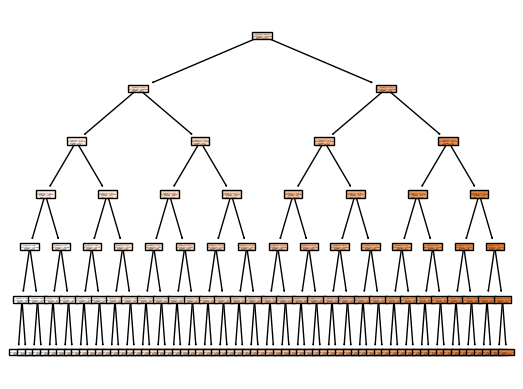

In [114]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fig,ax = plt.subplots()
plot_tree(tree, filled=True)

In [116]:
tree.tree_.children_left

array([  1,   2,   3,   4,   5,   6,  -1,  -1,   9,  -1,  -1,  12,  13,
        -1,  -1,  16,  -1,  -1,  19,  20,  21,  -1,  -1,  24,  -1,  -1,
        27,  28,  -1,  -1,  31,  -1,  -1,  34,  35,  36,  37,  -1,  -1,
        40,  -1,  -1,  43,  44,  -1,  -1,  47,  -1,  -1,  50,  51,  52,
        -1,  -1,  55,  -1,  -1,  58,  59,  -1,  -1,  62,  -1,  -1,  65,
        66,  67,  68,  69,  -1,  -1,  72,  -1,  -1,  75,  76,  -1,  -1,
        79,  -1,  -1,  82,  83,  84,  -1,  -1,  87,  -1,  -1,  90,  91,
        -1,  -1,  94,  -1,  -1,  97,  98,  99, 100,  -1,  -1, 103,  -1,
        -1, 106, 107,  -1,  -1, 110,  -1,  -1, 113, 114, 115,  -1,  -1,
       118,  -1,  -1, 121, 122,  -1,  -1, 125,  -1,  -1], dtype=int64)

In [117]:
tree.tree_.children_right

array([ 64,  33,  18,  11,   8,   7,  -1,  -1,  10,  -1,  -1,  15,  14,
        -1,  -1,  17,  -1,  -1,  26,  23,  22,  -1,  -1,  25,  -1,  -1,
        30,  29,  -1,  -1,  32,  -1,  -1,  49,  42,  39,  38,  -1,  -1,
        41,  -1,  -1,  46,  45,  -1,  -1,  48,  -1,  -1,  57,  54,  53,
        -1,  -1,  56,  -1,  -1,  61,  60,  -1,  -1,  63,  -1,  -1,  96,
        81,  74,  71,  70,  -1,  -1,  73,  -1,  -1,  78,  77,  -1,  -1,
        80,  -1,  -1,  89,  86,  85,  -1,  -1,  88,  -1,  -1,  93,  92,
        -1,  -1,  95,  -1,  -1, 112, 105, 102, 101,  -1,  -1, 104,  -1,
        -1, 109, 108,  -1,  -1, 111,  -1,  -1, 120, 117, 116,  -1,  -1,
       119,  -1,  -1, 124, 123,  -1,  -1, 126,  -1,  -1], dtype=int64)